In [1]:
from fenics import *
import matplotlib.pyplot as plt

In [10]:
# Estamos tratando de resolver:
# -Δu(x,y) - f(x,y) = 0   .... (1)
# Donde f(x,y) = xy

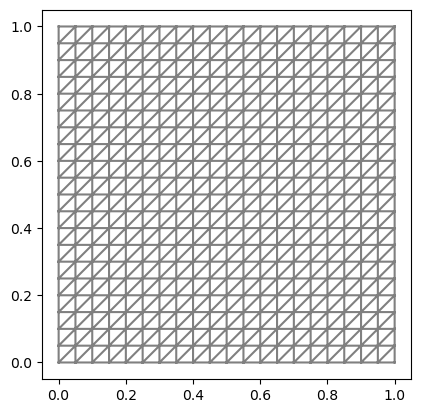

In [4]:
h=20
Th = UnitSquareMesh(h,h)
plot(Th)

In [3]:
# Definir f(x,y) = xy
f = Expression('x[0]*x[1]', degree=1)

In [8]:
# Definir el espacio de funciones,
function_space = FunctionSpace(Th, "Lagrange", 1)

In [12]:
#  sabemos que no estamos resolviendo (1), sino su forma variacional
# a(u,v) = lv(f)  .... (2)

u = TrialFunction(function_space)
v = TestFunction(function_space)
u_solution = Function(function_space)

# definimos el problema variacional
# a(u,v) - lv(f) = 0  .... (3)
a = dot( grad(u), grad(v) ) * dx
lv = f * v * dx


In [13]:
# La condición de borde la pongo como una función
# Necesitamos u=0 en todo el borde

def auxiliar(x, on_boundary):
    return on_boundary

boundary_condition = DirichletBC(function_space, Constant(0.0), auxiliar)

In [14]:
# Resolver
solve(a == lv, u_solution, boundary_condition)

Solving linear variational problem.


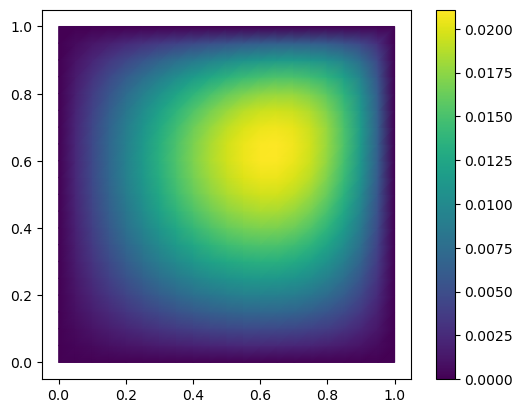

In [20]:
# Ahora puedo dibujar u
c = plot(u_solution, mode="color")
plt.colorbar(c)
# plot(Th)

In [25]:
# Si deseo puedo imprimir valores de u, o bien puedo imprimir todo u
print("El valor de u(0.5,0.4) = " + str(round(u_solution(0.5, 0.4),7)))

El valor de u(0.5,0.4) = 0.0159904


In [41]:
u_solution.vector().min()

0.0

In [42]:
u_solution.vector().max()

0.021092663905850278